<a href="https://colab.research.google.com/github/luisfelipebp/regression-student-habits/blob/main/regression_student_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

In [341]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [342]:
df = pd.read_csv('/content/drive/MyDrive/Data-Science/Regressão/students-habits/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [343]:
df['student_id'].value_counts()

,count
student_id,
S1999,1
S1000,1
S1001,1
S1002,1
S1003,1
...,...
S1012,1
S1011,1
S1010,1


In [344]:
df = df.drop('student_id', axis=1)

In [345]:
df['age'].value_counts()

,count
age,
20,146
24,134
17,133
21,125
23,119
18,117
19,113
22,113


In [346]:
df['gender'].value_counts()

,count
gender,
Female,481
Male,477
Other,42


In [347]:
df = df.drop(df.loc[df['gender'] == 'Other'].index)

In [348]:
df['study_hours_per_day'].value_counts()

,count
study_hours_per_day,
3.5,36
3.2,35
4.3,33
3.3,32
3.8,29
...,...
7.5,1
8.2,1
7.6,1


In [349]:
df['social_media_hours'].value_counts()

,count
social_media_hours,
3.1,37
2.1,35
2.4,33
3.2,33
2.9,33
3.0,32
1.9,31
2.2,31
2.8,30


In [350]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [351]:
df.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [352]:
df['netflix_hours'].value_counts()

,count
netflix_hours,
0.0,57
2.0,46
1.4,40
1.7,38
1.6,38
2.3,36
2.2,35
0.9,33
2.4,33


In [353]:
df['part_time_job'].value_counts()

,count
part_time_job,
No,753
Yes,205


In [354]:
df['attendance_percentage'].value_counts()

,count
attendance_percentage,
100.0,61
85.8,11
85.3,7
84.8,7
81.7,7
...,...
71.4,1
56.0,1
66.3,1


In [355]:
df['sleep_hours'].value_counts()

,count
sleep_hours,
6.5,38
6.1,36
6.2,35
6.7,32
7.1,31
...,...
9.2,1
9.8,1
3.2,1


In [356]:
df['diet_quality'].value_counts()

,count
diet_quality,
Fair,419
Good,364
Poor,175


In [357]:
df['exercise_frequency'].value_counts()

,count
exercise_frequency,
3,148
6,146
1,142
5,142
0,135
4,128
2,117


In [358]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,371
Bachelor,342
Master,160


In [359]:
df['internet_quality'].value_counts()

,count
internet_quality,
Good,425
Average,377
Poor,156


In [360]:
df['mental_health_rating'].value_counts()

,count
mental_health_rating,
4,106
6,104
8,101
1,100
3,99
10,96
5,95
2,89
7,85


In [361]:
df['extracurricular_participation'].value_counts()

,count
extracurricular_participation,
No,654
Yes,304


In [362]:
df['exam_score'].value_counts()

,count
exam_score,
100.0,47
65.6,7
80.9,7
74.0,7
75.4,6
...,...
94.0,1
86.9,1
31.1,1


In [363]:
df.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [364]:
mode = df.parental_education_level.mode()

In [365]:
df['parental_education_level'].fillna(mode[0], inplace=True)

In [366]:
df.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [367]:
df.shape

(958, 15)

In [368]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [369]:
df2 = pd.DataFrame.copy(df)

In [370]:
df2

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [371]:
df2['diet_quality'] = df2['diet_quality'].replace({'Poor': 0, 'Fair': 1, 'Good': 2})
df2['parental_education_level'] = df2['parental_education_level'].replace({'High School': 0, 'Bachelor': 1, 'Master': 2})
df2['internet_quality'] = df2['internet_quality'].replace({'Poor': 0, 'Average': 1, 'Good': 2})

In [372]:
df2

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,1,6,2,1,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,2,6,0,1,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,0,1,0,0,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,0,4,2,2,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,1,3,2,2,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,1,2,0,2,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,0,1,0,1,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,2,5,1,2,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,1,0,1,1,1,No,69.7


In [373]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [ 1, 5, 13])], remainder='passthrough')

In [374]:
transformed_data = onehotencoder.fit_transform(df2)

In [375]:
feature_names = onehotencoder.get_feature_names_out()
df2 = pd.DataFrame(transformed_data, columns=feature_names)

In [376]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [377]:
X = df2.iloc[:,0:17].values

In [378]:
y = df2.iloc[:,17].values

In [379]:
X.shape

(958, 17)

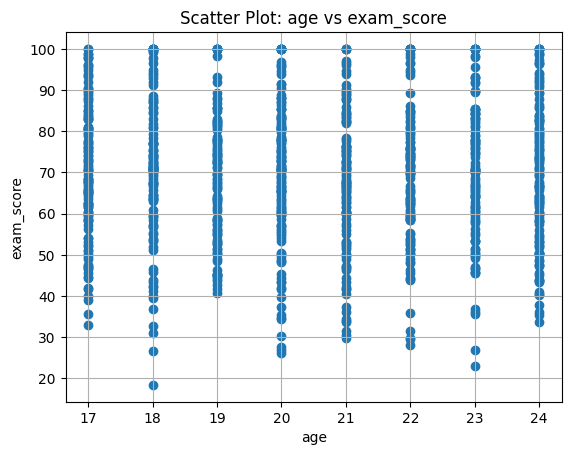

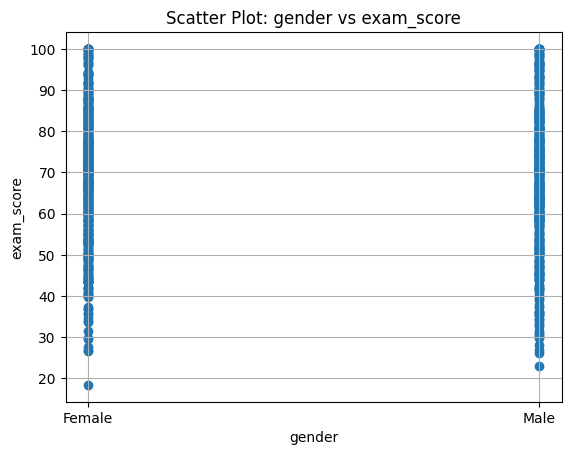

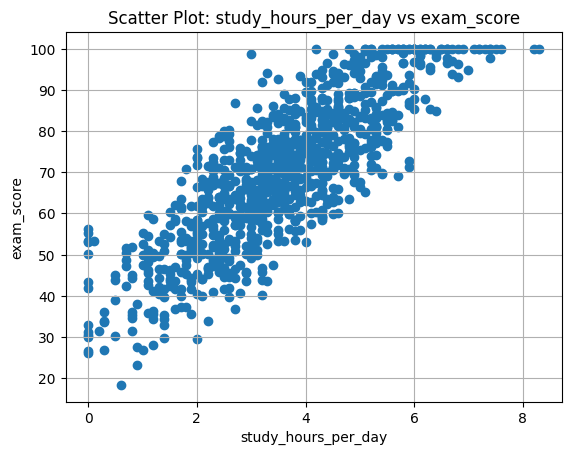

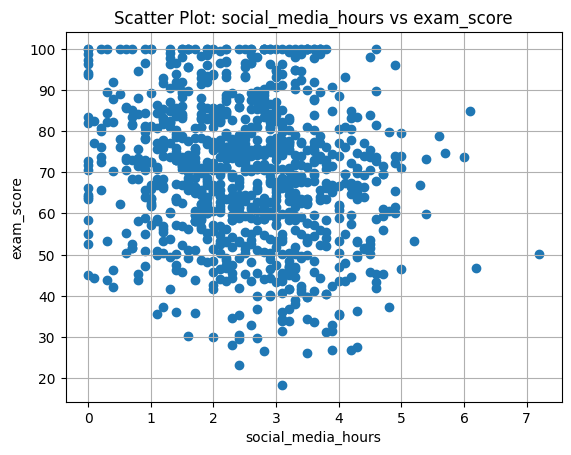

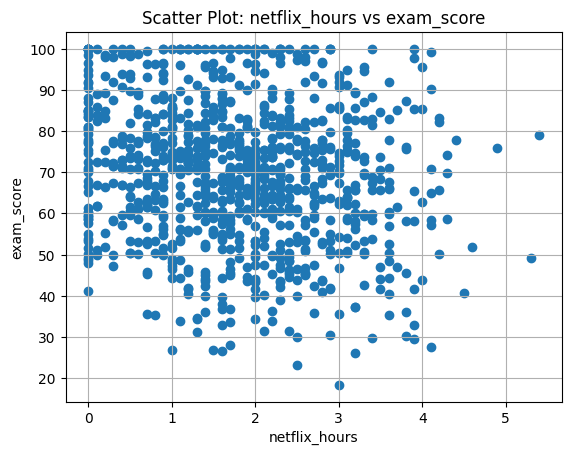

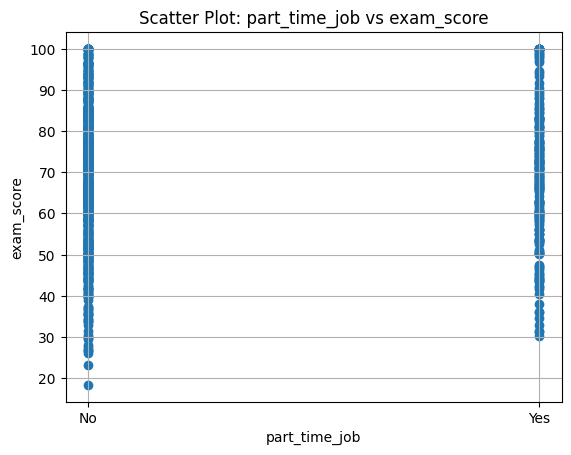

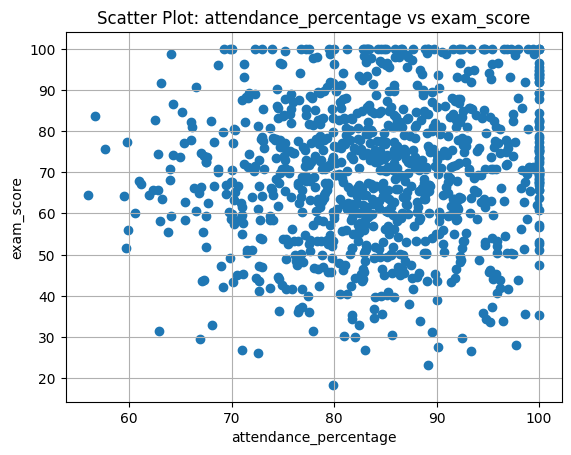

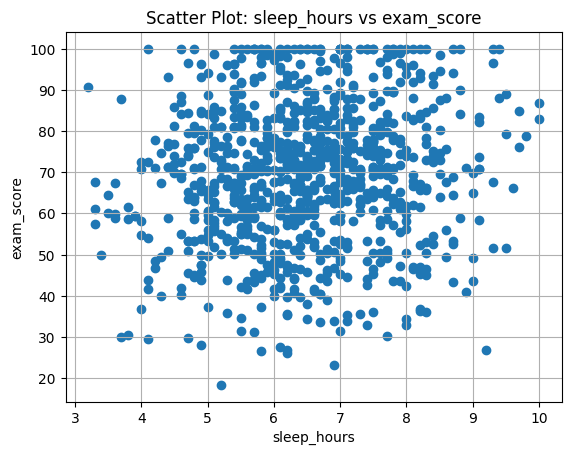

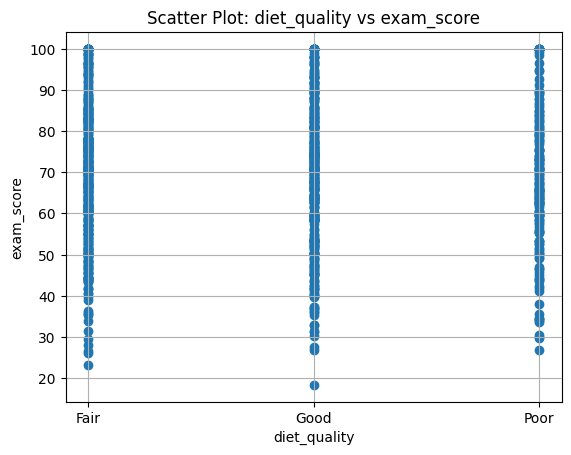

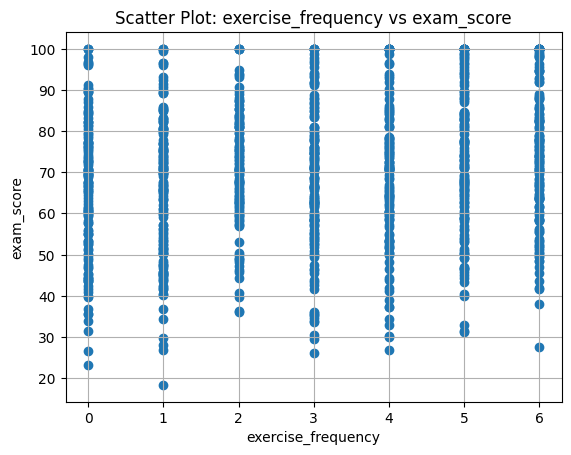

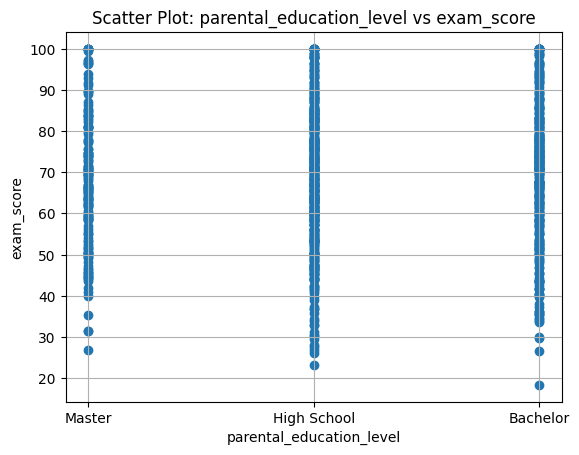

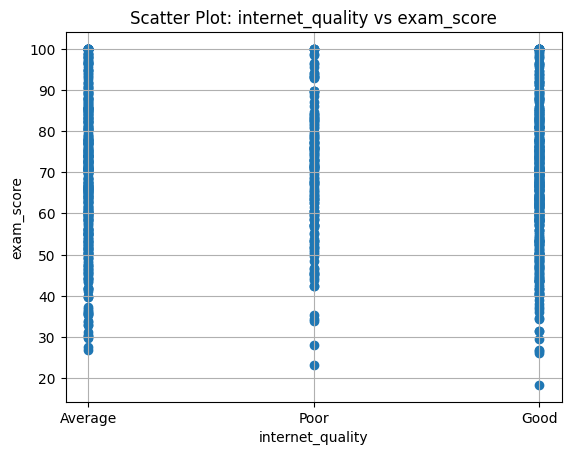

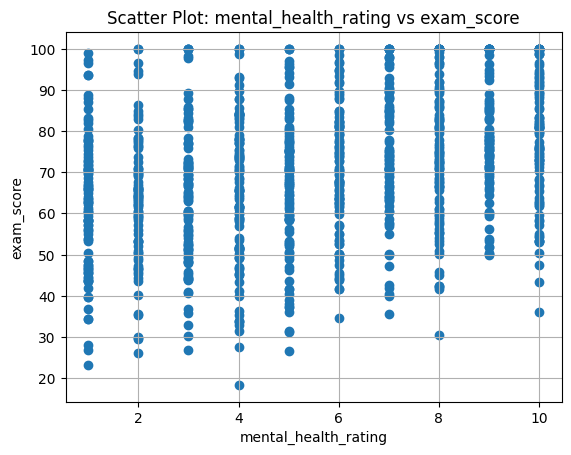

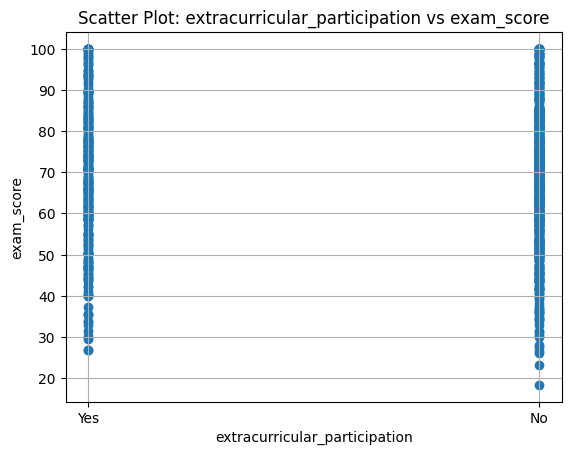

In [384]:
target_variable = 'exam_score'

feature_columns = [col for col in df.columns if col != target_variable]

for col in feature_columns:
    plt.scatter(df[col], df[target_variable])
    plt.title(f'Scatter Plot: {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()

In [385]:
import scipy.stats as stats

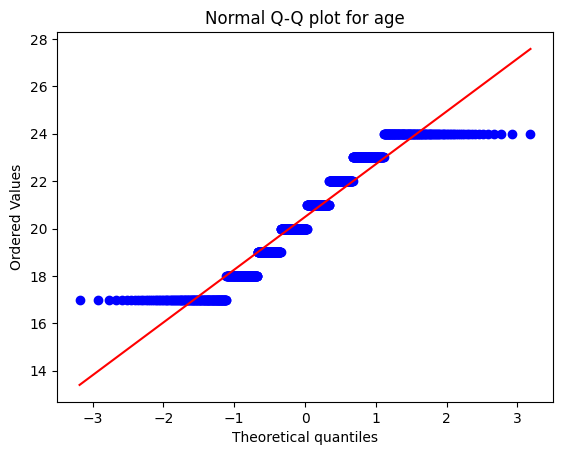

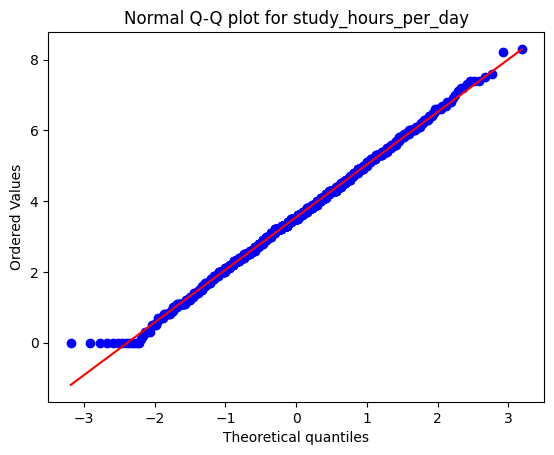

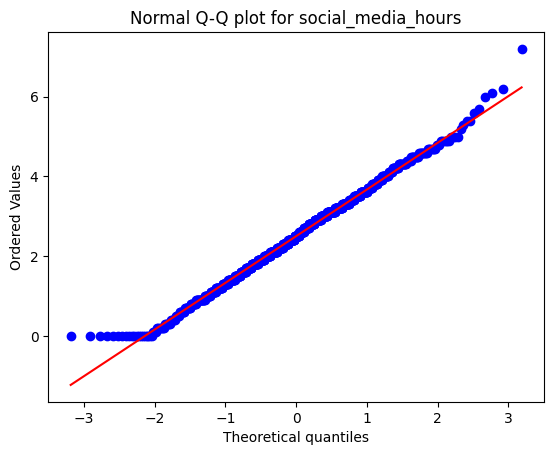

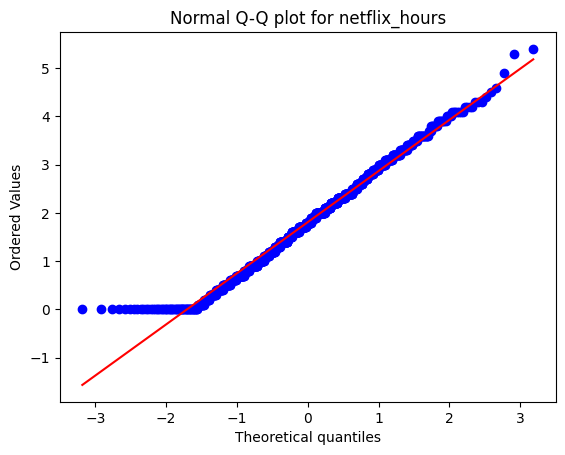

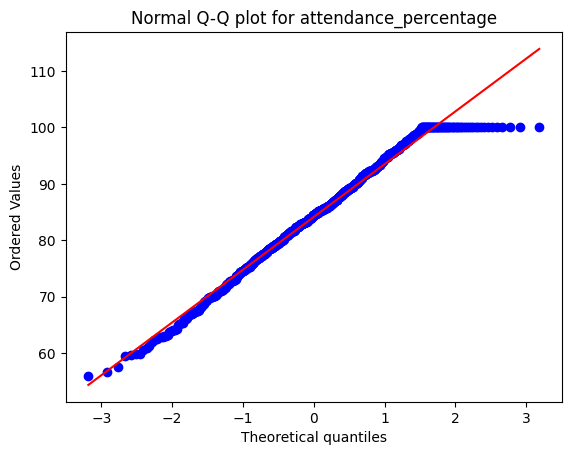

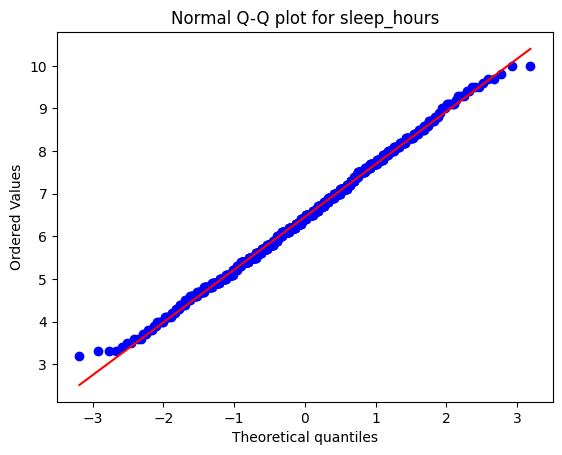

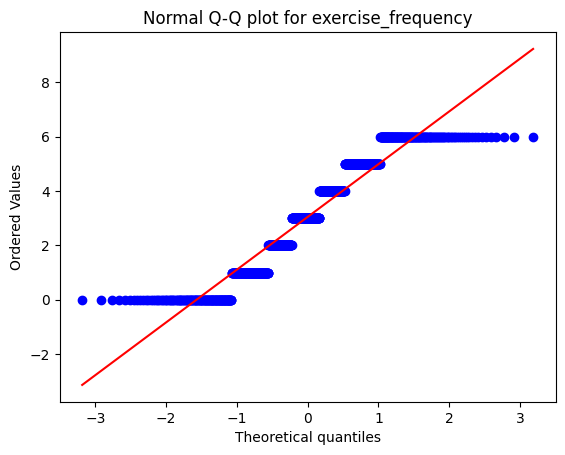

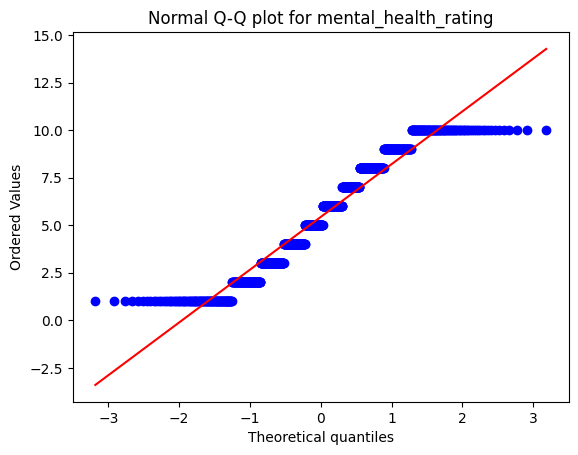

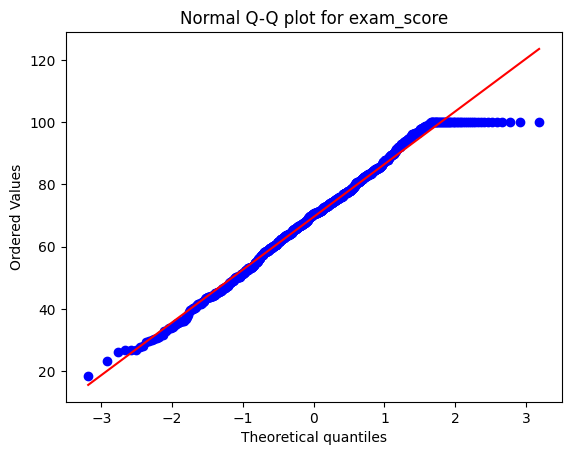

In [398]:
import scipy.stats as stats
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot for {col}")
    plt.show()